In [127]:
import  pandas as  pd
import os 
import re
import unicodedata
from datetime import datetime

In [128]:
f=open('WhatsApp Chat with Gang Bang (Hostel CBI)🚨🚓.txt', 'r',encoding='utf-8')

In [129]:
data = f.read()
f.close()

In [130]:
print(data)  # Display the first 1000 characters to check the content

06/06/22, 11:36 pm - Messages and calls are end-to-end encrypted. Only people in this chat can read, listen to, or share them. Learn more.
06/06/22, 11:36 pm - Om Chaudhari created group "Babu Gang 🥳"
06/06/22, 11:36 pm - Om Chaudhari added you
06/06/22, 11:36 pm - Tejas Dhurandhar Room Met: Bahinchod bol raha hai
06/06/22, 11:37 pm - Om Chaudhari: <Media omitted>
06/06/22, 11:37 pm - Tejas Dhurandhar Room Met: <Media omitted>
06/06/22, 11:37 pm - Tejas Dhurandhar Room Met: <Media omitted>
06/06/22, 11:37 pm - Tejas Dhurandhar Room Met: <Media omitted>
06/06/22, 11:37 pm - Tejas Dhurandhar Room Met: <Media omitted>
06/06/22, 11:39 pm - Om Gadkari Omkar Fri: <Media omitted>
06/06/22, 11:41 pm - Sahil 𝙳𝚊𝚋𝚑𝚊𝚍e changed the group description
06/06/22, 11:45 pm - Sahil 𝙳𝚊𝚋𝚑𝚊𝚍e: <Media omitted>
06/06/22, 11:48 pm - Om Chaudhari added +91 98508 58628
06/06/22, 11:48 pm - Om Chaudhari: Mane sir number ☝
06/06/22, 11:48 pm - Sahil 𝙳𝚊𝚋𝚑𝚊𝚍e: Noo
06/06/22, 11:48 pm - Sahil 𝙳𝚊𝚋𝚑𝚊𝚍e: Mane
06/06/22, 1

In [131]:
data = unicodedata.normalize("NFKC", data)
pattern = r'(\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s*(?:am|pm)\s-\s)'


In [132]:
messages= re.split(pattern, data) [1:] # Split the data into messages
messages 

['06/06/22, 11:36 pm - ',
 'Messages and calls are end-to-end encrypted. Only people in this chat can read, listen to, or share them. Learn more.\n',
 '06/06/22, 11:36 pm - ',
 'Om Chaudhari created group "Babu Gang 🥳"\n',
 '06/06/22, 11:36 pm - ',
 'Om Chaudhari added you\n',
 '06/06/22, 11:36 pm - ',
 'Tejas Dhurandhar Room Met: Bahinchod bol raha hai\n',
 '06/06/22, 11:37 pm - ',
 'Om Chaudhari: <Media omitted>\n',
 '06/06/22, 11:37 pm - ',
 'Tejas Dhurandhar Room Met: <Media omitted>\n',
 '06/06/22, 11:37 pm - ',
 'Tejas Dhurandhar Room Met: <Media omitted>\n',
 '06/06/22, 11:37 pm - ',
 'Tejas Dhurandhar Room Met: <Media omitted>\n',
 '06/06/22, 11:37 pm - ',
 'Tejas Dhurandhar Room Met: <Media omitted>\n',
 '06/06/22, 11:39 pm - ',
 'Om Gadkari Omkar Fri: <Media omitted>\n',
 '06/06/22, 11:41 pm - ',
 'Sahil Dabhade changed the group description\n',
 '06/06/22, 11:45 pm - ',
 'Sahil Dabhade: <Media omitted>\n',
 '06/06/22, 11:48 pm - ',
 'Om Chaudhari added +91 98508 58628\n',
 '

In [133]:
dates=re.findall(pattern, data)  # Extract dates from the data
len(messages), len(dates)  # Check if the number of messages and dates match

(1474, 737)

In [134]:
import re
import pandas as pd
import unicodedata
from datetime import datetime

def parse_whatsapp_chat(text):
    text = unicodedata.normalize("NFKC", text)  # normalize spaces

    # WhatsApp datetime regex
    pattern = r'(\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s*(?:am|pm)\s-\s)'

    matches = list(re.finditer(pattern, text))
    records = []

    for i in range(len(matches)):
        start = matches[i].end()  # message starts after timestamp
        end = matches[i+1].start() if i+1 < len(matches) else len(text)
        ts = matches[i].group(1).strip(" -")
        msg = text[start:end].strip()

        # Parse datetime
        try:
            dt = datetime.strptime(ts, "%d/%m/%y, %I:%M %p")
        except ValueError:
            # Some exports use yyyy instead of yy
            dt = datetime.strptime(ts, "%d/%m/%Y, %I:%M %p")

        records.append((dt, msg))

    df = pd.DataFrame(records, columns=["datetime", "message"])
    return df


In [135]:
parsed_df = parse_whatsapp_chat(data)
df = parsed_df  
df.shape  # Display the shape of the DataFrame
  # Display the first few rows of the DataFrame

(737, 2)

In [136]:
df.info()  # Display DataFrame information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737 entries, 0 to 736
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  737 non-null    datetime64[ns]
 1   message   737 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 11.6+ KB


In [137]:
df.head()

,datetime,message
0,2022-06-06 23:36:00,Messages and calls are end-to-end encrypted. O...
1,2022-06-06 23:36:00,"Om Chaudhari created group ""Babu Gang 🥳"""
2,2022-06-06 23:36:00,Om Chaudhari added you
3,2022-06-06 23:36:00,Tejas Dhurandhar Room Met: Bahinchod bol raha hai
4,2022-06-06 23:37:00,Om Chaudhari: <Media omitted>


In [138]:
users = []
messages = []
for message in df['message']:
    entry = re.split('([\w\W]+?):\s', message)
    if entry[1:]:  # user name
        users.append(entry[1])
        messages.append(" ".join(entry[2:]))
    else:
        users.append('group_notification')
        messages.append(entry[0])

In [139]:
df['user'] = users
df['message'] = messages
df.head()

,datetime,message,user
0,2022-06-06 23:36:00,Messages and calls are end-to-end encrypted. O...,group_notification
1,2022-06-06 23:36:00,"Om Chaudhari created group ""Babu Gang 🥳""",group_notification
2,2022-06-06 23:36:00,Om Chaudhari added you,group_notification
3,2022-06-06 23:36:00,Bahinchod bol raha hai,Tejas Dhurandhar Room Met
4,2022-06-06 23:37:00,<Media omitted>,Om Chaudhari


In [140]:

df['day']=df['datetime'].dt.day
df['time']=df['datetime'].dt.time
df['month']=df['datetime'].dt.month
df['yesr']=df['datetime'].dt.year
df['day_name'] = df['datetime'].dt.day_name()
df['hour']=df['datetime'].dt.hour
df['minute']=df['datetime'].dt.minute
df.drop(columns=['datetime'], inplace=True)


In [141]:
period = []
for hour in df[['day_name', 'hour']]['hour']:
    if hour == 23:
        period.append(str(hour) + "-" + str('00'))
    elif hour == 0:
        period.append(str('00') + "-" + str(hour + 1))
    else:
        period.append(str(hour) + "-" + str(hour + 1))

df['period'] = period

In [142]:
df.head()

,message,user,day,time,month,yesr,day_name,hour,minute,period
0,Messages and calls are end-to-end encrypted. O...,group_notification,6,23:36:00,6,2022,Monday,23,36,23-00
1,"Om Chaudhari created group ""Babu Gang 🥳""",group_notification,6,23:36:00,6,2022,Monday,23,36,23-00
2,Om Chaudhari added you,group_notification,6,23:36:00,6,2022,Monday,23,36,23-00
3,Bahinchod bol raha hai,Tejas Dhurandhar Room Met,6,23:36:00,6,2022,Monday,23,36,23-00
4,<Media omitted>,Om Chaudhari,6,23:37:00,6,2022,Monday,23,37,23-00


In [143]:
df.shape #overall messages


(737, 10)

In [144]:
df['user'].nunique()  # unique users


17

In [145]:
df['user'].value_counts()  # messages by user

user
Suraj Hatde                      114
Pravien Suryavanshi Room Met      73
Om Chaudhari                      69
Om Gadkari Omkar Fri              69
Prashant Chaudhari Tea            68
Room Mete                         59
Ganesh Roommate                   50
Omkar Borhade                     39
Sahil Dabhade                     36
Krupesh Manish Patil Room Met     34
Tejas Dhurandhar Room Met         28
Sanny Borse Room Met              26
*Luck_ Pawar*                     25
group_notification                24
+91 83293 05799                   14
Sager Chai                         6
+91 88550 88556                    3
Name: count, dtype: int64

In [146]:
words = []
for message in df['message']:
    words.extend(message.split())
    # fetch number of media messages
    
len(words)
#total words in messages


2784

In [147]:
words

['Messages',
 'and',
 'calls',
 'are',
 'end-to-end',
 'encrypted.',
 'Only',
 'people',
 'in',
 'this',
 'chat',
 'can',
 'read,',
 'listen',
 'to,',
 'or',
 'share',
 'them.',
 'Learn',
 'more.',
 'Om',
 'Chaudhari',
 'created',
 'group',
 '"Babu',
 'Gang',
 '🥳"',
 'Om',
 'Chaudhari',
 'added',
 'you',
 'Bahinchod',
 'bol',
 'raha',
 'hai',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 'Sahil',
 'Dabhade',
 'changed',
 'the',
 'group',
 'description',
 '<Media',
 'omitted>',
 'Om',
 'Chaudhari',
 'added',
 '+91',
 '98508',
 '58628',
 'Mane',
 'sir',
 'number',
 '☝',
 'Noo',
 'Mane',
 'Number',
 'Zop',
 'ree',
 'tu',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',


In [148]:
num_media_messages = df[df['message'] == '<Media omitted>'].shape[0]
num_media_messages

#MEDIA SHARING

489

In [149]:
#link sahre
from urlextract import URLExtract
extract = URLExtract()
links = []
for message in df['message']:
    links.extend(extract.find_urls(message))

len(links)  # total links shared

11

Text(0.5, 0, 'Users')

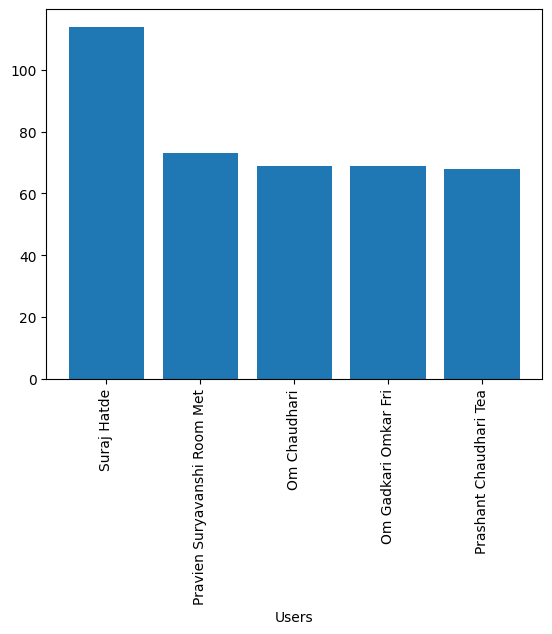

In [150]:
#most  bussy user
import matplotlib.pyplot as plt
x=df['user'].value_counts().head() # Top 5 users by message count\

nmaes = x.index
count = x.values

plt.bar(nmaes, count)
plt.xticks(rotation='vertical')
plt.xlabel('Users')



In [151]:
round(df['user'].value_counts()/df.shape[0]*100 ,2).reset_index().rename(columns={'user': 'name', 'count': 'percent'}) # Percentage of messages by each user

,name,percent
0,Suraj Hatde,15.47
1,Pravien Suryavanshi Room Met,9.91
2,Om Chaudhari,9.36
3,Om Gadkari Omkar Fri,9.36
4,Prashant Chaudhari Tea,9.23
5,Room Mete,8.01
6,Ganesh Roommate,6.78
7,Omkar Borhade,5.29
8,Sahil Dabhade,4.88
9,Krupesh Manish Patil Room Met,4.61


In [152]:
from wordcloud import WordCloud
def create_wordcloud(df):

    

    wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
    
    
    df_wc = wc.generate(df['message'].str.cat(sep=" "))
    return df_wc

NameError: name 'st' is not defined

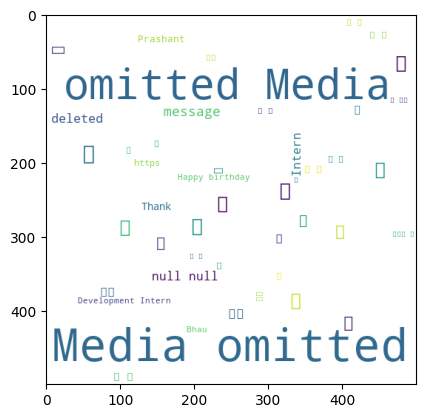

In [153]:

df_wc =create_wordcloud(df)
fig,ax = plt.subplots()
ax.imshow(df_wc)
st.pyplot(fig)

0      Messages and calls are end-to-end encrypted. O...
1               Om Chaudhari created group "Babu Gang 🥳"
2                                 Om Chaudhari added you
3                                 Bahinchod bol raha hai
4                                        <Media omitted>
                             ...                        
732                                      <Media omitted>
733                                      <Media omitted>
734                             Congratulations bhau🥳👍🎉🎉
735                                      <Media omitted>
736    https://www.instagram.com/reel/DIdyGkYSoV_/?ig...
Name: message, Length: 737, dtype: object

In [ ]:
woerds = []
for message in df['message']:   
    woerds.extend(message.split()) 

In [ ]:
from collections import Counter
pd.DataFrame(Counter(woerds).most_common(20), columns=['word', 'count']).sort_values(by='count', ascending=False)  # Most common words in messages

,word,count
0,<Media,489
1,omitted>,489
2,null,32
3,Intern,24
4,message,19
5,to,19
6,deleted,17
7,This,16
8,was,16
9,Happy,14


In [ ]:
temp=df[df['user'] !='group_notification']
temp=temp[temp['message'] !='<Media omitted>']

In [ ]:
f= open('stop_hinglish.txt', 'r')
stop_words1 = f.read()
print(stop_words)  # Display the stop words


.
..
...
?
-
--
1
2
3
4
5
6
7
8
9
0
a
aadi
aaj
aap
aapne
aata
aati
aaya
aaye
ab
abbe
abbey
abe
abhi
able
about
above
accha
according
accordingly
acha
achcha
across
actually
after
afterwards
again
against
agar
ain
aint
ain't
aisa
aise
aisi
alag
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
andar
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
ap
apan
apart
apna
apnaa
apne
apni
appear
are
aren
arent
aren't
around
arre
as
aside
ask
asking
at
aur
avum
aya
aye
baad
baar
bad
bahut
bana
banae
banai
banao
banaya
banaye
banayi
banda
bande
bandi
bane
bani
bas
bata
batao
bc
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
best
better
between
beyond
bhai
bheetar
bhi
bhitar
bht
bilkul
bohot
bol
bola
bole
boli
bolo
bolta
bolte
bolti
both
brief
bro
btw
but
by
came
can
cannot
cant
can't
cause
causes
certain
certainly
chahiye
chaiye
chal
chalega
chhaiye
clearly
c'mon
com
come
comes
could
coul

In [ ]:
f= open('stopwords-mr.txt', 'r',encoding='utf-8')
stop_words2 = f.read()
print(stop_words)  

.
..
...
?
-
--
1
2
3
4
5
6
7
8
9
0
a
aadi
aaj
aap
aapne
aata
aati
aaya
aaye
ab
abbe
abbey
abe
abhi
able
about
above
accha
according
accordingly
acha
achcha
across
actually
after
afterwards
again
against
agar
ain
aint
ain't
aisa
aise
aisi
alag
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
andar
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
ap
apan
apart
apna
apnaa
apne
apni
appear
are
aren
arent
aren't
around
arre
as
aside
ask
asking
at
aur
avum
aya
aye
baad
baar
bad
bahut
bana
banae
banai
banao
banaya
banaye
banayi
banda
bande
bandi
bane
bani
bas
bata
batao
bc
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
best
better
between
beyond
bhai
bheetar
bhi
bhitar
bht
bilkul
bohot
bol
bola
bole
boli
bolo
bolta
bolte
bolti
both
brief
bro
btw
but
by
came
can
cannot
cant
can't
cause
causes
certain
certainly
chahiye
chaiye
chal
chalega
chhaiye
clearly
c'mon
com
come
comes
could
coul

In [ ]:
stop_words = stop_words1 + ' ' + stop_words2

In [ ]:
print(stop_words)  # Display the combined stop words

.
..
...
?
-
--
1
2
3
4
5
6
7
8
9
0
a
aadi
aaj
aap
aapne
aata
aati
aaya
aaye
ab
abbe
abbey
abe
abhi
able
about
above
accha
according
accordingly
acha
achcha
across
actually
after
afterwards
again
against
agar
ain
aint
ain't
aisa
aise
aisi
alag
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
andar
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
ap
apan
apart
apna
apnaa
apne
apni
appear
are
aren
arent
aren't
around
arre
as
aside
ask
asking
at
aur
avum
aya
aye
baad
baar
bad
bahut
bana
banae
banai
banao
banaya
banaye
banayi
banda
bande
bandi
bane
bani
bas
bata
batao
bc
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
best
better
between
beyond
bhai
bheetar
bhi
bhitar
bht
bilkul
bohot
bol
bola
bole
boli
bolo
bolta
bolte
bolti
both
brief
bro
btw
but
by
came
can
cannot
cant
can't
cause
causes
certain
certainly
chahiye
chaiye
chal
chalega
chhaiye
clearly
c'mon
com
come
comes
could
coul

In [ ]:
words = []
for message in temp['message']: 
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)  
    words.extend(message.split())

In [154]:
words

['Messages',
 'and',
 'calls',
 'are',
 'end-to-end',
 'encrypted.',
 'Only',
 'people',
 'in',
 'this',
 'chat',
 'can',
 'read,',
 'listen',
 'to,',
 'or',
 'share',
 'them.',
 'Learn',
 'more.',
 'Om',
 'Chaudhari',
 'created',
 'group',
 '"Babu',
 'Gang',
 '🥳"',
 'Om',
 'Chaudhari',
 'added',
 'you',
 'Bahinchod',
 'bol',
 'raha',
 'hai',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 'Sahil',
 'Dabhade',
 'changed',
 'the',
 'group',
 'description',
 '<Media',
 'omitted>',
 'Om',
 'Chaudhari',
 'added',
 '+91',
 '98508',
 '58628',
 'Mane',
 'sir',
 'number',
 '☝',
 'Noo',
 'Mane',
 'Number',
 'Zop',
 'ree',
 'tu',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '<Media',


In [168]:
def most_common_words(selected_user, df):
    with open('stop_hinglish.txt','r',encoding='utf-8') as f:
        stop_words = set(f.read().split())

    if selected_user != 'Overall':
        df = df[df['user'] == selected_user]

    temp = df[(df['user'] != 'group_notification') & (df['message'] != '<Media omitted>\n')]

    words = []
    for message in temp['message']:
        for word in message.lower().split():
            if word not in stop_words:
                words.append(word)

    most_common_df = pd.DataFrame(Counter(words).most_common(20), columns=['word','count'])
    return most_common_df


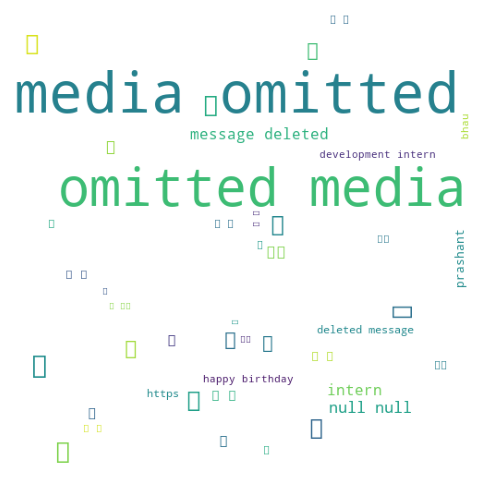

           word  count
0        <media    489
1      omitted>    489
2          null     32
3        intern     24
4       message     19
5       deleted     17
6         happy     14
7      birthday     14
8      prashant     10
9           आहे      9
10  development      9
11         aahe      7
12        lucky      7
13      हार्दिक      7
14         bhau      7
15         send      6
16            ,      6
17            व      6
18       आपल्या      6
19   friendship      5


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2310 (\N{DEVANAGARI LETTER AA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2361 (\N{DEVANAGARI LETTER HA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2375 (\N{DEVANAGARI VOWEL SIGN E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\p

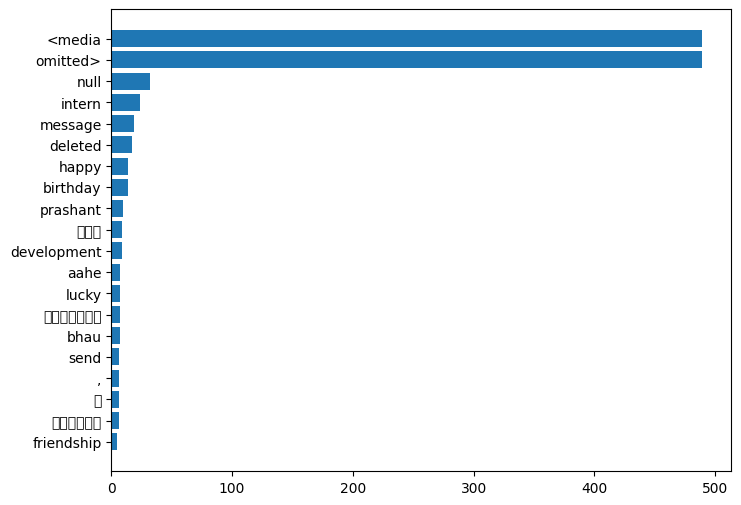

In [169]:
# WordCloud
wc = create_wordcloud('Overall', df)

plt.figure(figsize=(8, 6))
plt.imshow(wc)
plt.axis("off")
plt.show()

# Most common words
common_df = most_common_words('Overall', df)
print(common_df)

# Or plot them
plt.figure(figsize=(8, 6))
plt.barh(common_df['word'], common_df['count'])
plt.gca().invert_yaxis()  # so highest appears on top
plt.show()
